# Grove ADC Example

This example shows how to use the Grove ADC.

A Grove I2C ADC (v1.2) and PYNQ Grove Adapter are required. An analog input is also required. In this example, the Grove slide potentiometer was used.

In the example, the ADC is initialized, a test read is done, and then the sensor is set to log a reading every 100 milliseconds. The ADC can be connected to any Grove peripheral that provides an analog voltage. 

## 1. Using Pmod to Grove Adapter
This example uses the PYNQ Pmod to Grove adapter. The adapter is connected to PMODA, and the grove ADC is connected to group `G4` on adapter.
### 1. Simple ADC read()

In [1]:
from pynq.overlays.base import BaseOverlay
base = BaseOverlay("base.bit")

In [2]:
from pynq.lib.pmod import Grove_ADC
from pynq.lib.pmod import PMOD_GROVE_G4 

grove_adc = Grove_ADC(base.PMODA,PMOD_GROVE_G4)
print("{} V".format(round(grove_adc.read(),4)))

1.2866 V


### 2. Starting logging once every 100 milliseconds

In [3]:
grove_adc.set_log_interval_ms(100)
grove_adc.start_log()

### 3. Try to change the input signal during the logging. 

For example, if using the Grove slide potentiometer, move the slider back and forth (slowly). 

Stop the logging whenever done trying to change sensor's value.

In [4]:
log = grove_adc.get_log()

### 4. Plot values over time
The voltage values can be logged and displayed.

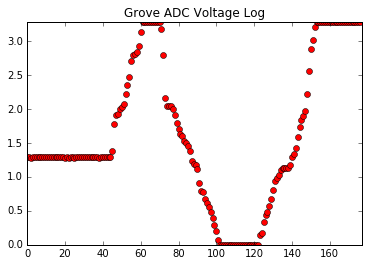

In [5]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.plot(range(len(log)), log, 'ro')
plt.title('Grove ADC Voltage Log')
plt.axis([0, len(log), min(log), max(log)])
plt.show()

Copyright (C) 2020 Xilinx, Inc